In [2]:
import numpy as np
import yfinance as yf

In [3]:
tickers = ['^GSPC','GC=F']

In [ ]:
df = yf.download(tickers,start='2020-01-01')['Adj Close']

In [5]:
df.head()

,GC=F,^GSPC
Date,,
2020-01-02,1524.500000,3257.850098
2020-01-03,1549.199951,3234.850098
2020-01-06,1566.199951,3246.280029
2020-01-07,1571.800049,3237.179932
2020-01-08,1557.400024,3253.050049


In [7]:
ret_df = np.log(df/df.shift(1)) # daily log return

In [8]:
ret_df.corr() # correlation between S&P500 and Gold

,GC=F,^GSPC
GC=F,1.000000,0.126965
^GSPC,0.126965,1.000000


In [ ]:
ret_df.cumsum() # we can use cumsum to get cumulative returns since it's log returns

<Axes: xlabel='Date'>

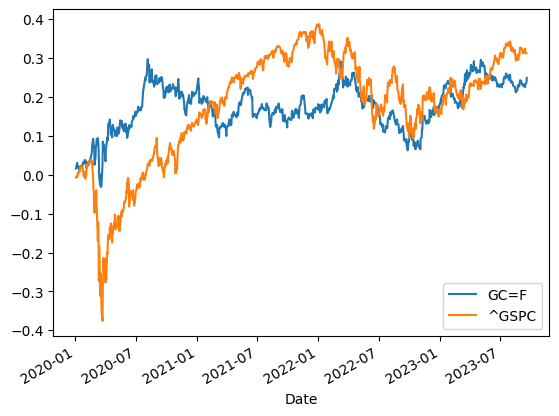

In [11]:
ret_df.cumsum().plot()

In [14]:
ret_df.mean() # average returns of both assets
# Gold has a lower mean return

GC=F     0.000267
^GSPC    0.000335
dtype: float64

In [16]:
# Risk
ret_df.std() # Gold has a lower stanrdard deviation

GC=F     0.010564
^GSPC    0.014956
dtype: float64

In [ ]:
# Return of the portfolio using matrix notation

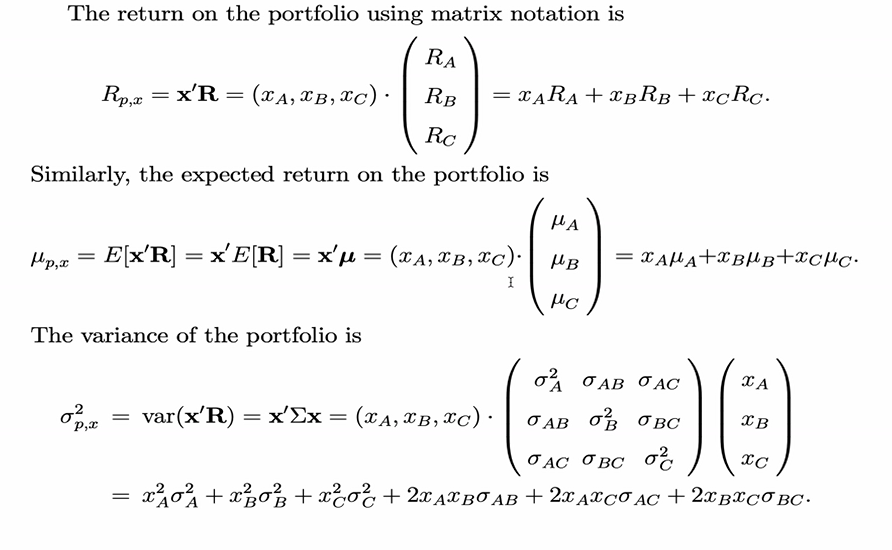

In [ ]:
np.ones(len(ret_df.columns)) # we want the weights to be non-static
# But we also want equal weights
np.ones(len(ret_df.columns)) / (np.ones(len(ret_df.columns))).sum()

In [17]:
W = np.ones(len(ret_df.columns)) / (np.ones(len(ret_df.columns))).sum()

In [ ]:
# Now the expected return of the portfolio

In [18]:
(W * ret_df.mean()).sum()

0.0003008265529608028

In [19]:
# or
ret_df.mean().dot(W)

0.0003008265529608028

In [20]:
ret_df.cov()

,GC=F,^GSPC
GC=F,0.000112,0.000020
^GSPC,0.000020,0.000224


In [21]:
# Risk with variance of the portfolio
# W[0] is the portfolio variance
# we can get the variance of the single assets from ret_df.cov() diagonally
(W[0] ** 2) * 0.000112 + (W[1] ** 2) * 0.000224 + 2*W[0]*W[1]*0.000020 # the last number is the covariance

9.4e-05

In [23]:
# Then we get the sqaure root of the result
9.4e-05**(1/2)
# the portfolio risk is:

0.009695359714832657

In [ ]:
# Making the formula scaleable

In [26]:
(W.T.dot(ret_df.cov().dot(W))) ** (1/2)

0.009687358372851507

In [27]:
# Sharpe Ratio

# single assets:
print(ret_df.mean() / ret_df.std())

# portfolio:
prtfl_risk = (W.T.dot(ret_df.cov().dot(W))) ** (1/2)
ret_df.mean().dot(W) / prtfl_risk

GC=F     0.025234
^GSPC    0.022405
dtype: float64


0.031053517520716382